In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#The purpose of this script is to identify which normalization method will give us the weakest sample effect.
#As the purpose of this technology is to allow integration of studies for more robust statistical results,
#the first level of variability to overcome is the study effect

#Possible normalization schemes:
#1. Relative Abundances
#2. Log transform of abundances
#3. DeSeq variance stabilization
#4. Cumulative Sum Scaling normalization

#Process:
#Normalize the training otu table with each of the above schemes, then measure the difference between studies in the freshwater environmental dataset.
#In the American gut project, (don't have batch information)

In [35]:
f = open("data/silva/otu_train.obj", "rb")
otu_train = pickle.load(f)
f.close()

f = open("data/silva/otu_test.obj", "rb")
otu_test = pickle.load(f)
f.close()

f = open("data/silva/map_train.obj", "rb")
map_train = pickle.load(f)
f.close()

f = open("data/silva/qual_vecs_500.obj", "rb")
qual_vecs = pickle.load(f)
f.close()

f = open("data/silva/map_train.obj", "rb")
map_train = pickle.load(f)
f.close()

f = open("data/silva/map_test.obj", "rb")
map_test = pickle.load(f)
f.close()

In [3]:
def embed(otu, qual_vecs):
    qual_vecs_use = qual_vecs.loc[list(otu.columns.values)]
    df = pd.DataFrame(np.dot(otu, qual_vecs_use), index = otu.index.values)
    return(df)

In [4]:
def embed_occurrence(otu, qual_vecs):
    qual_vecs_use = qual_vecs.loc[list(otu.columns.values)]
    occurrence = otu_train.astype(bool)
    df = pd.DataFrame(np.dot(occurrence, qual_vecs_use), index = otu.index.values)
    return(df)

In [5]:
print("hello")

hello


In [24]:
def embed_frequency(otu, qual_vecs):
    qual_vecs_use = qual_vecs.loc[list(otu.columns.values)]
    occurrence = otu_train.astype(bool)
    frequencies = occurrence.sum(axis = 0)
    inverse_freq_mat = occurrence.div(frequencies, axis = 1)
    df = pd.DataFrame(np.dot(inverse_freq_mat, qual_vecs_use), index = otu.index.values)
    return(df)

In [29]:
def embed_count_frequency(otu, qual_vecs):
    qual_vecs_use = qual_vecs.loc[list(otu.columns.values)]
    occurrence = log_normalize(otu)
    frequencies = occurrence.sum(axis = 0)
    inverse_freq_mat = occurrence.div(frequencies, axis = 1)
    df = pd.DataFrame(np.dot(inverse_freq_mat, qual_vecs_use), index = otu.index.values)
    return(df)

In [37]:
qual_vecs_use = qual_vecs.loc[list(otu.columns.values)]
occurrence = log_normalize(otu)
frequencies = occurrence.sum(axis = 0)

#OTU ID
AAAA02048336      358.237684
AACY020539760      12.476649
AACY023242300      18.832757
AACY023337690      52.574954
AB008429            2.772589
AB021334            7.336937
AB030599          275.497716
AB039017          131.759187
AB042233            0.693147
AB049103          483.858210
AB049105          555.315037
AB051695         1380.708856
AB073109         1386.779157
AB073112           10.044987
AB073114         2985.361595
AB078056            1.386294
AB089102          695.640786
AB094541          141.302791
AB096215           19.214505
AB105159          167.678983
AB114256            9.010913
AB114421            2.079442
AB114611          194.510234
AB114612          205.248332
AB115967           83.354833
AB118592          231.296850
AB119201            2.772589
AB126355          147.169486
AB161680           34.065089
AB176217          207.508844
                    ...     
X72776            471.104244
X73401            151.444871
X79452            311.869545
X81044

In [7]:
#Normalize for relative abundances

def rel_abund_normalize(otu):
    #Normalize
    sample_sums = otu.sum(axis=1)
    otu_norm = otu.div(sample_sums, axis=0)
    otu_logRatio = np.log(otu_norm.div(otu_norm.iloc[:, 0], axis = 0))
    return(otu_norm)

otu_rel_abund = rel_abund_normalize(otu_train)

In [31]:
#Normalize with log transforms (take the log of every taxa abundance, after adding 1 to each. The idea is we want to tamper
#down the variances at the high abundances while keeping the variance at the low abundances to)

def log_normalize(otu):
    return(np.log(otu + 1))

otu_logNorm = log_normalize(otu_train)

In [19]:
#CSS normalization
#Metagenome seq does not exist in python. We'll do this in R too, and read in the file
otu_cssNorm = pd.read_csv("data/AG_new/otu_train_cssNorm.csv")

C:\Users\ctata\Miniconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [26]:
#PCA with each
from sklearn.decomposition import PCA
def plotPCA(table, color = "input"):
    pca = PCA(n_components= 5)
    pca.fit(table)
    table_pca = pca.transform(table)
    table_pca = table_pca / np.max(table_pca)
    df = pd.DataFrame(table_pca, index = table.index.values)
    #df.add(mapping.temperature_deg_c)
    plt.figure(figsize=(10,5))
    x = df.iloc[:,0].values
    y = df.iloc[:,1].values
    #fig, ax = plt.subplots()
    sample_sums = otu_train.sum(axis = 1)
    sample_sums_table = table.sum(axis = 1)
    if color == "input":
        plt.scatter(x,y, c = sample_sums_table, cmap='viridis', label = sample_sums_table)
    if color == "raw":
        plt.scatter(x,y, c = sample_sums, cmap='viridis', label = sample_sums)
    #ax.xlabel(pca.explained_variance_ratio_[0])
    #ax.ylabel(pca.explained_variance_ratio_[1])
    cbar = plt.colorbar()
    cbar.set_label("Sequencing Depth")
    return x, y



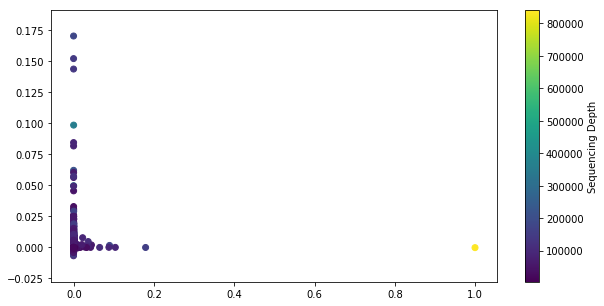

In [205]:
plotPCA(otu_cssNorm, color = "input")

(array([0.10217498, 0.10126704, 0.10150558, ..., 0.06888054, 0.08080737,
        0.07256196]),
 array([ 0.00275547, -0.00221766,  0.00108467, ...,  0.00063353,
         0.00078059,  0.00082745]))

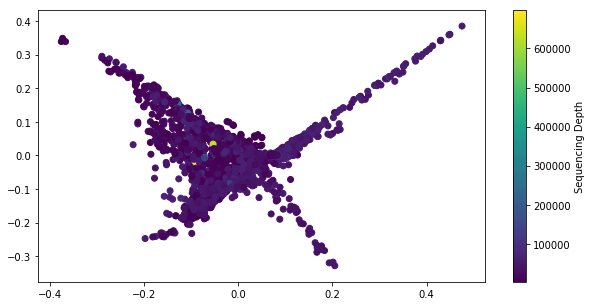

In [12]:
plotPCA(otu_rel_abund, color = "raw")
#Now there are two gradients. Is one of them the same as the previous gradient?

(array([ 0.69551886,  0.66570242,  0.6383888 , ..., -0.04438104,
        -0.041159  , -0.04386911]),
 array([ 0.05896637,  0.03665444,  0.0311776 , ..., -0.42114253,
        -0.4776686 , -0.42737115]))

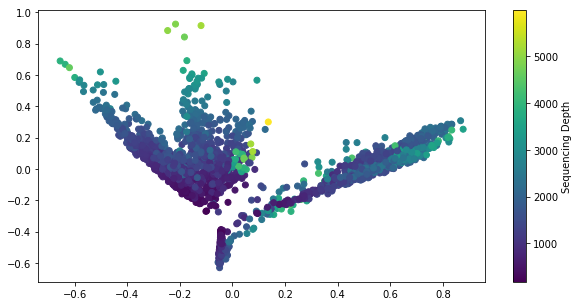

In [13]:
plotPCA(otu_logNorm)
#Looks good. We should use this for now. And also use this in our environmental data

Same tests, now with embeddings

(array([0.28332934, 0.2839706 , 0.27637292, ..., 0.76322937, 0.78522221,
        0.6630018 ]),
 array([-0.48413073, -0.49602363, -0.47843437, ...,  0.26003375,
         0.46895931,  0.32860851]))

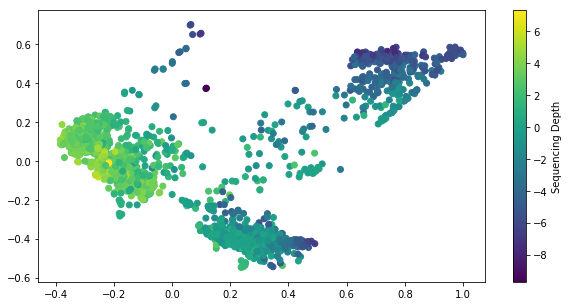

In [21]:
plotPCA(embed(otu_rel_abund, qual_vecs_500))

(array([-0.41512101, -0.41321195, -0.38703254, ..., -0.08702548,
        -0.08758634, -0.07917174]),
 array([ 0.13691992,  0.13737796,  0.11359264, ..., -0.35932038,
        -0.37562793, -0.33470145]))

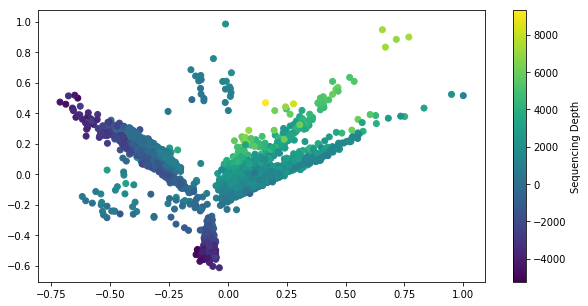

In [22]:
plotPCA(embed(otu_logNorm, qual_vecs_500))

(array([-0.48855401, -0.49898245, -0.46072849, ..., -0.16679444,
        -0.17719956, -0.16549997]),
 array([ 0.1241348 ,  0.1602296 ,  0.12887884, ..., -0.37378091,
        -0.41688111, -0.38885006]))

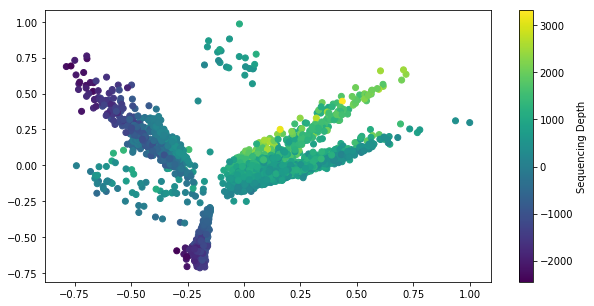

In [28]:
plotPCA(embed_occurrence(otu_train, qual_vecs))

(array([ 0.10136019,  0.08045885,  0.09030896, ..., -0.03803741,
         0.00507444, -0.02705319]),
 array([ 0.02467769,  0.03982482,  0.03796778, ..., -0.05385779,
        -0.06802161, -0.05624078]))

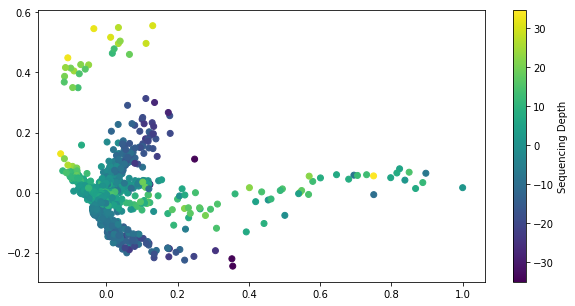

In [27]:
plotPCA(embed_frequency(otu_train, qual_vecs))

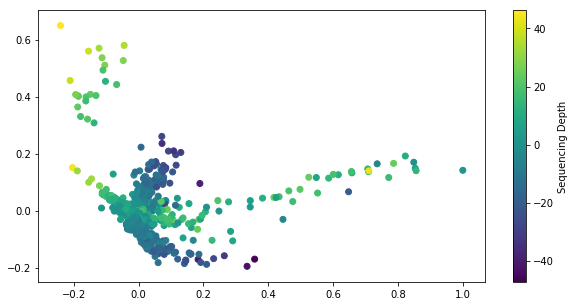

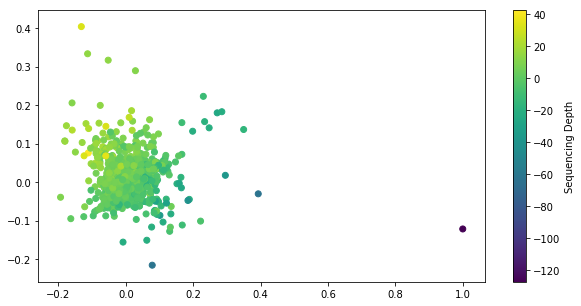

In [36]:
embed_idf_train = embed_count_frequency(otu_train, qual_vecs)
plotPCA(embed_idf_train)

embed_idf_test = embed_count_frequency(otu_test, qual_vecs)
plotPCA(embed_idf_test)

f = open("embed_idf_train.obj", "wb")
pickle.dump(embed_idf_train, f)
f.close()

f = open("embed_idf_test.obj", "wb")
pickle.dump(embed_idf_test, f)
f.close()

(array([ 0.01948325,  0.02565467,  0.0004709 , ..., -0.08767428,
        -0.096069  , -0.08614591]),
 array([ 0.23800096,  0.26227504,  0.18061229, ..., -0.03723396,
        -0.0440666 , -0.03981309]))

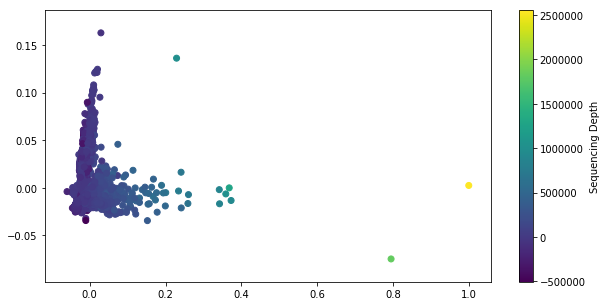

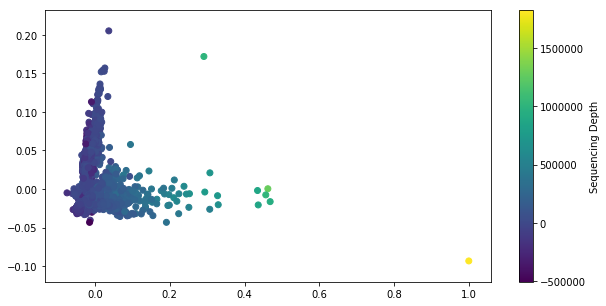

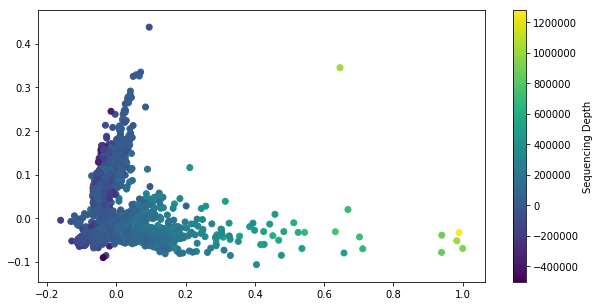

In [29]:
x, y = plotPCA(embed(otu_train, qual_vecs_500))
otu_train2 = otu_train.drop(otu_train.index[np.where(x == max(x))])
otu_train2 = otu_train2.drop(otu_train2.index[np.where(y == max(y))])
x, y = plotPCA(embed(otu_train2, qual_vecs_500))
otu_train2 = otu_train2.drop(otu_train2.index[np.where(x == max(x))])
otu_train2 = otu_train2.drop(otu_train2.index[np.where(y == max(y))])
plotPCA(embed(otu_train2, qual_vecs_500))

In [30]:
otu_train.shape

(2490, 10302)